## Introduction

This repo explains how to use R to analyze real estate data that I scraped. The dataset has 5064 rows, covering the real estate lists from most cities in the Metro Vancouver area on Jul 20, 2021. However, the website that I used only allows to scrape at most 25 pages for each city using the start URL, so some lists from the cities are missing.

To know how I scraped the data, check my another repo [RealEsatelist_scrape_clean_transform][1].
If you want to scrape the whole list of each city in Vancouver, check [my article, which uses another website as an example][2]. However, it will not allow you to scrape land size for houses. But, it allows you to scrape list type if you change the URL format and add list type parameters inside.

### Interested to see the insights found directly? Go check the highlight texts at the bottom of this notebook.
                                                                                 
[1]:https://github.com/EvaWang2020/RealEsateDataAnalysis
[2]:https://evaanalytics.wixsite.com/website/post/use-scrapy-to-real-estate-data

In [8]:
Data=read.csv("C://replace_with_your_path/realestatelist_totallistappend.csv")   
Data$Price <- as.numeric(gsub('[$,]', '', Data$Price))

# below is a peak of the data structure 
head(Data)

Price,Bedroom_qty,Bathroom_qty,Floor_size,Address,City_region,City,List_type,Date,Land_width,Land_depth
1998000,5,4,1993,3465 E 50th Avenue,Killarney,Vancouver,Duplex,7/20/2021,50,108
3200000,5,2,1968,3122 W 16th Avenue,Arbutus,Vancouver,House,7/20/2021,50,150
1049900,2,2,1010,403 1230 Haro Street,West End,Vancouver,Apt/Condo,7/20/2021,NA,NA
1899000,4,2,2080,107 E 58th Avenue,South Vancouver,Vancouver,House,7/20/2021,37,110
838000,2,2,828,104 1818 W 6th Avenue,Kitsilano,Vancouver,Apt/Condo,7/20/2021,NA,NA
1079000,2,2,900,1102 1618 Quebec Street,Mount Pleasant East,Vancouver,Apt/Condo,7/20/2021,NA,NA


In [9]:
# below is a summary of the data. You can see the min, max, median, quartiles of each column
summary(Data)

     Price           Bedroom_qty      Bathroom_qty      Floor_size   
 Min.   :   84800   Min.   : 0.000   Min.   : 0.000   Min.   :    0  
 1st Qu.:  650000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.:  896  
 Median :  998000   Median : 3.000   Median : 2.000   Median : 1388  
 Mean   : 1431451   Mean   : 3.081   Mean   : 2.639   Mean   : 1910  
 3rd Qu.: 1650000   3rd Qu.: 4.000   3rd Qu.: 3.000   3rd Qu.: 2391  
 Max.   :46000000   Max.   :16.000   Max.   :12.000   Max.   :86250  
                                     NA's   :66       NA's   :61     
                            Address                 City_region  
 3820 64 Street                 :   2   Coquitlam West    : 185  
 968 Riverside Drive            :   2   Willoughby Heights: 174  
 #104 530 Ninth Street          :   1   Brighouse         : 125  
 #3103 1901 Nels Nelson Crescent:   1   Langley City      : 105  
 1 10119 River Drive            :   1   Metrotown         : 100  
 1 1130 Ewen Avenue             :   1   Down

In [11]:
# tranform currency string into values 
Data$Price <- as.numeric(gsub('[$,]', '', Data$Price))
# print(Data$Price)

# calculate the average price per floor square foot (sf)
Average_sf_cost=Data$Price/Data$Floor_size
# caluclate land size
Landsize=(Data$Land_width)*(Data$Land_depth)
# add them as columns to the table 
Data$Average_sf_cost <- Average_sf_cost
Data$Landsize <- Landsize


# calcualte the average price per floor square foot
# Ingnore the rows with empty and zero values in column Floor_siz
library (dplyr) 
Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
Subset_Avg_sf_price =  mean(Subset_Data$Average_sf_cost,na.rm = TRUE)
round(Subset_Avg_sf_price)

[1] 785

In [12]:
# calculate the average floor sf price by list type
# you can add more filters, such as setting up bedroom quantity 
library(dplyr)
Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
# Subset_Data<- filter(Subset_Data, Subset_Data$Bedroom_qty==1)
# Subset_Data<- filter(Subset_Data, Subset_Data$Bathroom_qty==1)  
# Subset_Data<- filter(Subset_Data, Subset_Data$City=='Vancouver')  


ex1 <- Subset_Data %>% 
  group_by(List_type) %>% 
  summarize(Avg_price = round(mean(Average_sf_cost,na.rm = TRUE)), 
            Max_price = round(max(Average_sf_cost,na.rm = TRUE)),
            Min_price = round(min(Average_sf_cost,na.rm = TRUE)),
            List_count = length(Price))
ex1  %>%
    arrange(Avg_price)

List_type,Avg_price,Max_price,Min_price,List_count
Mfd/Mobile Home,316,1175,118,23
Recreational,526,526,526,1
Townhouse,619,1863,277,725
Multifamily,683,1605,322,34
Duplex,784,1544,351,80
House,815,22565,160,1970
Apt/Condo,817,3284,201,2164
Land/Lot,2386,5208,533,4


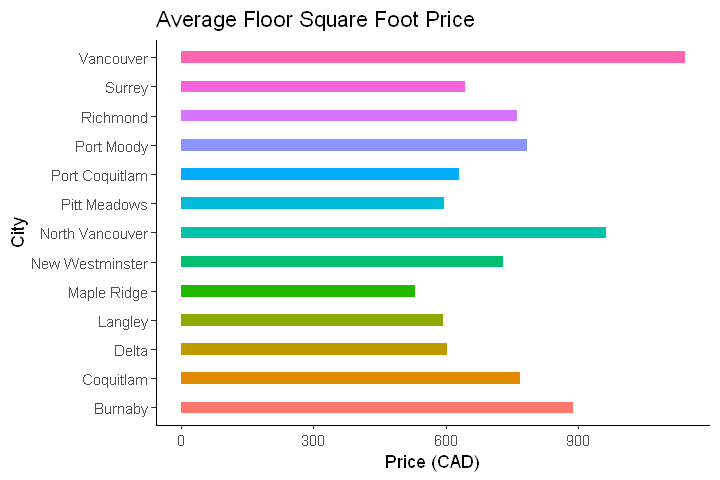

In [14]:
# create a function to calculate the average sf price by the city for appartmet (Appt) list
# you can add more filters, such as setting up bedroom quantity 
library(ggplot2)


Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size))
Subset_Data<- filter(Subset_Data, Subset_Data$List_type=='Apt/Condo')
# Subset_Data<- filter(Subset_Data, Subset_Data$Bedroom_qty==1)
# Subset_Data<- filter(Subset_Data, Subset_Data$Bathroom_qty==1)       
    
ex1<-Subset_Data %>% 
    group_by(City) %>% 
    summarize(Avg_price = mean(Average_sf_cost,na.rm = TRUE),List_Count = length(Price) ) 

options(repr.plot.width=6, repr.plot.height=4)
ggplot(ex1, aes(y = City, x =Avg_price, Color=City,fill=City)) +
    geom_bar(stat = "identity", width=0.4, show.legend = FALSE) + 
    theme_classic() + 
    #scale_x_reordered() +
    labs(
        y = "City",
        x = "Price (CAD)",
        title = paste(
            "Average Floor Square Foot Price"
     )
    )


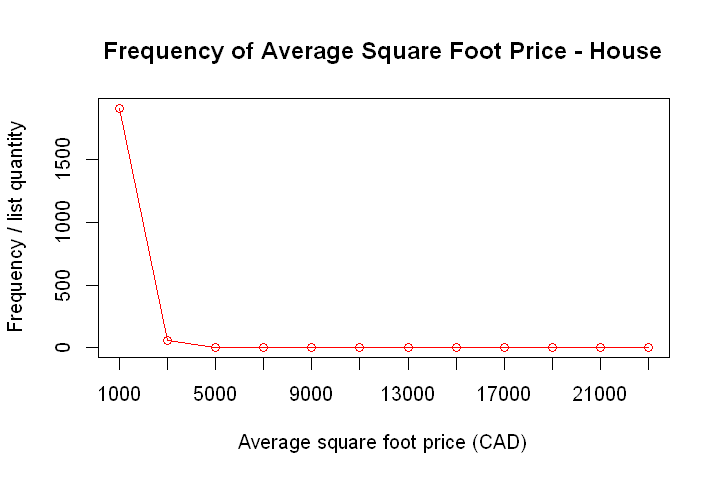

In [15]:
# average price frequency of for House only
# you can add more filters, such as setting up specific city/cities

Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
Subset_Data<- filter(Subset_Data,  Subset_Data$List_type=='House')
# Subset_Data<- filter(Subset_Data, Subset_Data$City=='Vancouver')  


data=hist(Subset_Data$Average_sf_cost,plot=FALSE,breaks=12)  
ymax=max(data[[2]])  # to find the max number of Y axis based on type 2 data of a vector
options(repr.plot.width=6, repr.plot.height=4)
plot(data[[4]],data[[2]],type='o',
     ylab="Frequency / list quantity",xlab="Average square foot price (CAD)",main="Frequency of Average Square Foot Price - House" ,frame.plot='TRUE',axes=FALSE,ylim=c(0,ymax+1), col="red")  # ylim is the function to define the numbe limit of Y axis 

axis(1,data[[4]])
axis(2)


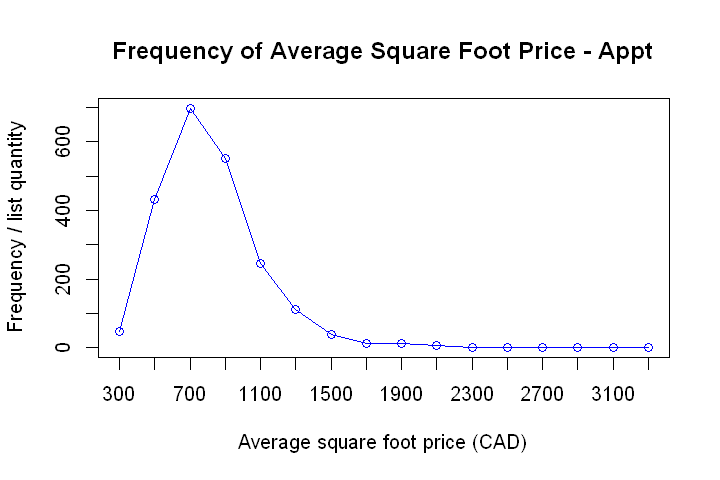

In [16]:
# average price frequency of for appt only
# you can add more filters, such as setting up specific city/cities
Subset_Data1<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
Subset_Data1<- filter(Subset_Data1,  Subset_Data1$List_type=='Apt/Condo')
# Subset_Data1<- filter(Subset_Data1, Subset_Data1$City=='Vancouver')  


data=hist(Subset_Data1$Average_sf_cost,plot=FALSE,breaks=12)  
ymax=max(data[[2]])  # to find the max number of Y axis based on type 2 data of a vector
options(repr.plot.width=6, repr.plot.height=4)
plot(data[[4]],data[[2]],type='o',
     ylab="Frequency / list quantity",xlab="Average square foot price (CAD)",main="Frequency of Average Square Foot Price - Appt" ,frame.plot='TRUE',axes=FALSE,ylim=c(0,ymax+1),col="blue")  # ylim is the function to define the numbe limit of Y axis 

axis(1,data[[4]])
axis(2)

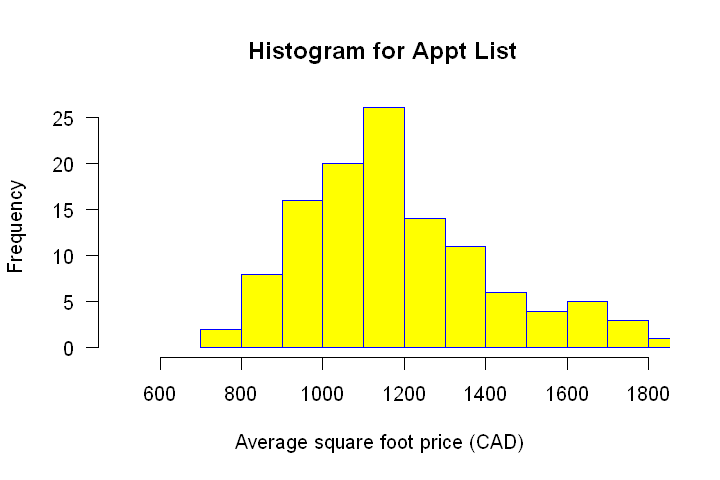

In [17]:
# zoom in to check frequency in a smaller price range for specif areas
# you can add more filters, such as setting up specific city regions
Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
Subset_Data<- filter(Subset_Data,  Subset_Data$List_type=='Apt/Condo')
# Subset_Data<- filter(Subset_Data, Subset_Data$City=='Vancouver' )
Subset_Data<- filter(Subset_Data,  Subset_Data$City_region=='Downtown West' |  Subset_Data$City_region=='Coal Harbour' |  Subset_Data$City_region=='Cambie' | Subset_Data$City_region=='Yaletown')


hist(Subset_Data$Average_sf_cost,
     main="Histogram for Appt List", 
     xlab="Average square foot price (CAD) ", 
     border="blue", 
     col="yellow",
     xlim=c(500,1800),
     las=1,
     breaks=30 )


In [22]:
# calcualte correlation of different variables of each city for house 
# some house lists do not have land size value due to missing dimension
# Therefore, after layers of filtering, the total list count is smaller than the real total list count
Array=unique(Data$City, incomparables = FALSE)
n=length(Array)
for(i in 1:n ){
  A = Array[i]

  Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
  Subset_Data<- filter(Subset_Data,  !is.na(Subset_Data$Landsize))
  Subset_Data<- filter(Subset_Data,  !is.na(Subset_Data$Bedroom_qty))
  Subset_Data<- filter(Subset_Data,  !is.na(Subset_Data$Bathroom_qty))
  Subset_Data<- filter(Subset_Data,  !is.na(Subset_Data$Landsize))  
  Subset_Data<- filter(Subset_Data,  Subset_Data$List_type=='House')
  Subset_Data<- filter(Subset_Data,  Subset_Data$City==A)
  
  x=Subset_Data$Average_sf_cost
  y=Subset_Data$Bedroom_qty
  z=Subset_Data$Bathroom_qty
  l=Subset_Data$Floor_size
  m=Subset_Data$Landsize
   
  X=cbind(x,y,z,l,m)  
  print(paste('Correlation Matrix of house; City:', A))
  print(round(cor(X),5))
  print('--------------------------------------------------------')
}


[1] "Correlation Matrix of house; City: Vancouver"
         x        y       z       l       m
x  1.00000 -0.20501 0.00929 0.12361 0.39713
y -0.20501  1.00000 0.68523 0.51877 0.12949
z  0.00929  0.68523 1.00000 0.73558 0.39265
l  0.12361  0.51877 0.73558 1.00000 0.67532
m  0.39713  0.12949 0.39265 0.67532 1.00000
[1] "--------------------------------------------------------"
[1] "Correlation Matrix of house; City: Langley"
         x        y        z        l        m
x  1.00000 -0.35265 -0.37316 -0.25582  0.53029
y -0.35265  1.00000  0.75735  0.55986  0.00751
z -0.37316  0.75735  1.00000  0.78102 -0.05277
l -0.25582  0.55986  0.78102  1.00000  0.15699
m  0.53029  0.00751 -0.05277  0.15699  1.00000
[1] "--------------------------------------------------------"
[1] "Correlation Matrix of house; City: North Vancouver"
         x        y        z        l       m
x  1.00000 -0.27354 -0.31904 -0.44250 0.06243
y -0.27354  1.00000  0.68586  0.66453 0.23762
z -0.31904  0.68586  1.00000  0.8

### How to understand the results? Using the correlation matrix of Richmond as an example:
>Between x and x, the correlation coefficient is 1.0000. The number suggests x and x are strongly postively correlated. Of course, they are !

>Between x and m, the correlation coefficient is 0.00092. The number suggests x and m are just slightly postively correlated. __<span style="color:red">This means land size
contributes little to the average square foot price of houses in Richmond</span>__ (_pls notice: here the average square foot price is an aggregation between list
price and floor size, not between list price and land size_). 


- __x is a centralized average square foot price vector__
- __y is a centralized average bedroom quantity vector__
- __z is a centralized average bathroom quantity vector__ 
- __l is a centralized average floor size vector__ 
- __m is a centralized average land size vector__ 

[1] "Correlation Matrix of house; City: Richmond"
         x        y        z        l       m
x  1.00000 -0.19968 -0.16357 -0.07772 0.00092
y -0.19968  1.00000  0.59397  0.52311 0.02755
z -0.16357  0.59397  1.00000  0.71028 0.02315
l -0.07772  0.52311  0.71028  1.00000 0.28391
m  0.00092  0.02755  0.02315  0.28391 1.00000

### Using the correlation matrix of Vancouver as another example: 
>Between x and m, the correlation coefficient is 0.39713, which is much bigger when compared with Richmond. This result means x and m are 
postively correlated. It suggests that the land size contribute significantly to the average square foot price of the
houses in Vancouver. In another word, __<span style="color:red">the land itself is much more valuable in Vancouver than in Richmond and contributes significantly to the average square foot price of Vancouver houses</span>__. 

[1] "Correlation Matrix of house; City: Vancouver"
         x        y       z       l       m
x  1.00000 -0.20501 0.00929 0.12361 0.39713
y -0.20501  1.00000 0.68523 0.51877 0.12949
z  0.00929  0.68523 1.00000 0.73558 0.39265
l  0.12361  0.51877 0.73558 1.00000 0.67532
m  0.39713  0.12949 0.39265 0.67532 1.00000

In [21]:
Array=unique(Data$City, incomparables = FALSE)
n=length(Array)
for(i in 1:n ){
  A = Array[i]
  
  Subset_Data<- filter(Data, Data$Floor_size>0 & !is.na(Data$Floor_size) )
  Subset_Data<- filter(Subset_Data,  !is.na(Subset_Data$Bedroom_qty))
  Subset_Data<- filter(Subset_Data,  !is.na(Subset_Data$Bathroom_qty))
  Subset_Data<- filter(Subset_Data,  Subset_Data$List_type=='Apt/Condo')
  Subset_Data<- filter(Subset_Data, Subset_Data$City==A)
  
  x=Subset_Data$Average_sf_cost
  y=Subset_Data$Bedroom_qty
  z=Subset_Data$Bathroom_qty
  l=Subset_Data$Floor_size
   
  X=cbind(x,y,z,l)  
  print(paste('Correlation Matrix of apartment; City:', A))
  print(round(cor(X),5))
  print('--------------------------------------------------------')
}

[1] "Correlation Matrix of apartment; City: Vancouver"
        x       y       z       l
x 1.00000 0.30241 0.38590 0.40166
y 0.30241 1.00000 0.77728 0.68787
z 0.38590 0.77728 1.00000 0.79829
l 0.40166 0.68787 0.79829 1.00000
[1] "--------------------------------------------------------"
[1] "Correlation Matrix of apartment; City: Langley"
         x        y        z        l
x  1.00000 -0.16166 -0.07615 -0.26667
y -0.16166  1.00000  0.58518  0.68132
z -0.07615  0.58518  1.00000  0.63153
l -0.26667  0.68132  0.63153  1.00000
[1] "--------------------------------------------------------"
[1] "Correlation Matrix of apartment; City: North Vancouver"
        x       y       z       l
x 1.00000 0.35419 0.44915 0.45605
y 0.35419 1.00000 0.79046 0.74226
z 0.44915 0.79046 1.00000 0.77357
l 0.45605 0.74226 0.77357 1.00000
[1] "--------------------------------------------------------"
[1] "Correlation Matrix of apartment; City: Richmond"
         x        y       z        l
x  1.00000 -0.01414 0

### Here we use Langley as an example:
> Between x and l, the correlation coefficient is -0.26667. The number means x and l are negatively correlated. This suggests that __<span style="color:red">in Langley, the bigger the apartment
is, the cheaper each square foot is</span>__ .


In [ ]:
[1] "Correlation Matrix of apartment; City: Langley"
         x        y        z        l
x  1.00000 -0.16166 -0.07615 -0.26667
y -0.16166  1.00000  0.58518  0.68132
z -0.07615  0.58518  1.00000  0.63153
l -0.26667  0.68132  0.63153  1.00000

### Let compare with Vancouver and Surrey
> For vancouver, between x and l, the correlation coefficient is 0.40166. This result means x and l are 
positively correlated. __<span style="color:red">It suggests that the bigger the appartement is in Vancouver, the more expensive the average square foot is. This is the opposite situation of Langley</span>__.

> For Surrey, between x and l, the correlation coefficient is -0.15118. This means x and l are 
slightly negatively correlated. __<span style="color:red">It suggests in Surrey, the smaller the apartment is, the higher the average square foot price is. This shows similarity with Langley</span>__. 

In [ ]:
[1] "Correlation Matrix of apartment; City: Vancouver"
        x       y       z       l
x 1.00000 0.30241 0.38590 0.40166
y 0.30241 1.00000 0.77728 0.68787
z 0.38590 0.77728 1.00000 0.79829
l 0.40166 0.68787 0.79829 1.00000

[1] "Correlation Matrix of apartment; City: Surrey"
         x        y       z        l
x  1.00000 -0.14714 0.05086 -0.15118
y -0.14714  1.00000 0.69331  0.64490
z  0.05086  0.69331 1.00000  0.73708
l -0.15118  0.64490 0.73708  1.00000


### Why Bowen Island has so many "NA"?
> Because Bowen Island does not have apartment lists, only house lists

In [ ]:
#[1] "Correlation Matrix of apartment; City: Port Moody"
   x  y  z  l
#x NA NA NA NA
#y NA NA NA NA
#z NA NA NA NA
#l NA NA NA NA

### Limitation of this analysis: 
- Error of Average. Average can be deceiving. For example, it was found that in the Vancouver apartment market, the bigger the unit it, the more expensive each square foot might be. This is true for the overall average situation. However, when you break down the numbers, you might find some districts in Vancouver show the same trends as Langley and Surrey, which is the smaller the unit is, the higher each square foot is. [Check my short article related to risk of aggregation][2]
- The daatset has only one day list data. Later, I will add more data to the dataset. [Check my repo to see how I collected the data.][1]
- the website that I used only allows to scrape at most 25 pages for each city using the start URL, so some lists from the cities are missing. If you want to scrape the whole list of each city in Vancouver, check [my article, which uses another website as an example][3]. However, it will not allow you to scrape land size for houses. But, it allows you to scrape list type if you change the URL format and add list type parameters inside.
[1]:https://github.com/EvaWang2020/RealEsateDataAnalysis
[2]:https://github.com/EvaWang2020/Analyze-real-estae-lists-using-R/blob/main/Risk%20of%20average%20and%20generalization.pdf
[3]:https://evaanalytics.wixsite.com/website/post/use-scrapy-to-real-estate-data